# Robust Scaling

Robust Scaler are robust to outliers.It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:<br>

IQR = 75th quantile - 25th quantile<br>

X_scaled = (X - X.median) / IQR<br>

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 <br>
1-10 precentile---10% of all values in this group is less than 1 <br>
4-40%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('titanic.csv', usecols=['Survived',"Pclass","Fare","Age"])
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,NaN,23.4500
889,1,1,26.0,30.0000


In [9]:
df["Age"].fillna(df.Age.median(), inplace=True)
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,28.0,23.4500
889,1,1,26.0,30.0000


## (i) Scaling/Transforming the dataset as df 

In [12]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_robust=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


Text(0.5, 1.0, 'Age Before Robust Scaling')

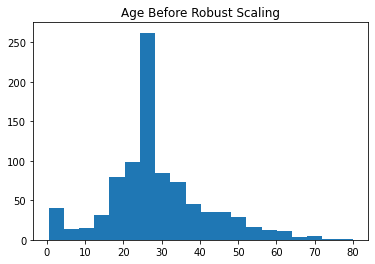

In [18]:
plt.hist(df['Age'],bins=20)
plt.title("Age Before Robust Scaling")

Text(0.5, 1.0, 'Age After Robust Scaling')

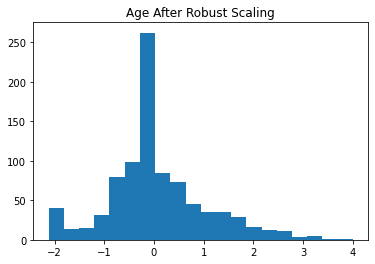

In [16]:
plt.hist(df_robust['Age'],bins=20)
plt.title("Age After Robust Scaling")

Text(0.5, 1.0, 'Fare before Robust Scaling')

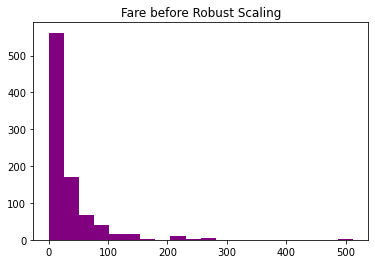

In [22]:
plt.hist(df['Fare'],bins=20,color='purple')
plt.title("Fare before Robust Scaling")

Text(0.5, 1.0, 'Fare After Robust Scaling')

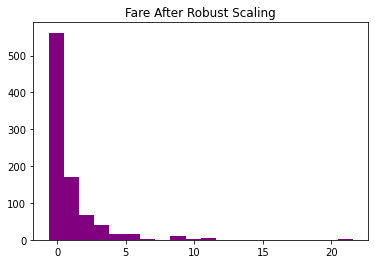

In [29]:
plt.hist(df_robust['Fare'],bins=20,color='purple')
plt.title("Fare After Robust Scaling")

Text(0.5, 1.0, 'Pclass before Robust Scaling')

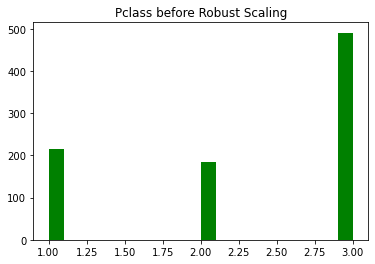

In [28]:
plt.hist(df['Pclass'],bins=20,color='green')
plt.title("Pclass before Robust Scaling")

Text(0.5, 1.0, 'Pclass After Robust Scaling')

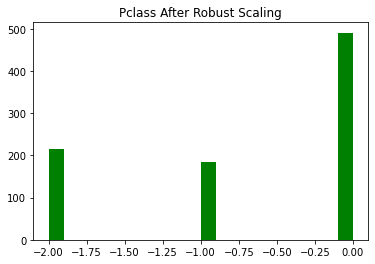

In [30]:
plt.hist(df_robust['Pclass'],bins=20,color='green')
plt.title("Pclass After Robust Scaling")

# (ii) Scaling/Transforming the dataset by splitting for model

In [31]:
#Separating the independent and dependent features
x=df.iloc[:,1:] # independent
y=df.iloc[:,0]  # dependent

In [32]:
x

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,28.0,23.4500
889,1,26.0,30.0000


In [33]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split  # creating model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [35]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

x_train_robust = pd.DataFrame(scaler.fit_transform(x_train), columns=["Pclass",'Age','Fare'])
x_train_robust.head()

,Pclass,Age,Fare
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630


In [36]:
x_test_robust = scaler.transform(x_test) 
x_test_robust

array([[ 0.00000000e+00,  0.00000000e+00,  3.39014989e-02],
       [-1.00000000e+00,  2.30769231e-01, -1.69344754e-01],
       [ 0.00000000e+00, -6.15384615e-01, -2.79623126e-01],
       [-1.00000000e+00, -1.69230769e+00,  7.94252677e-01],
       [ 0.00000000e+00, -1.07692308e+00, -1.37580300e-01],
       [-2.00000000e+00, -1.53846154e-01,  2.75785011e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.87117773e-01],
       [ 0.00000000e+00, -9.23076923e-01,  1.51854390e-01],
       [ 0.00000000e+00, -9.23076923e-01, -2.87117773e-01],
       [-2.00000000e+00, -6.92307692e-01,  5.06599572e-01],
       [-2.00000000e+00,  6.92307692e-01,  1.65506638e+00],
       [ 0.00000000e+00,  1.23076923e+00, -2.74269807e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.71627409e-01],
       [ 0.00000000e+00,  1.53846154e-01, -3.09601713e-01],
       [-1.00000000e+00,  6.15384615e-01, -6.22783726e-02],
       [-2.00000000e+00, -9.23076923e-01,  1.06834261e+00],
       [-2.00000000e+00,  1.07692308e+00

### Algorithm starts :

In [37]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()

In [39]:
classification.fit(x_train_robust,y_train)

LogisticRegression()

In [41]:
predict =classification.predict(x_test_robust) # Machine prediction on testing data
predict

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [42]:
#Printing the classification report

from sklearn import metrics
print(metrics.classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       218
           1       0.47      0.74      0.58        77

    accuracy                           0.72       295
   macro avg       0.68      0.73      0.68       295
weighted avg       0.78      0.72      0.73       295

